In [37]:
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from azure.storage.blob import BlobServiceClient

from src.paychex_ml.utils import load_credentials
from src.paychex_ml.utils import get_blob_list

In [2]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [3]:
mapping = pd.read_csv("C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/mapping.csv", encoding="latin_1")

In [4]:
# Start client
container_name = "raw-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [5]:
blob_list = get_blob_list(blob_service_client)

In [6]:
list_df = []
for name in blob_list:

    if name in mapping.File.unique():
        print("Processing: ", name)
        stream = container_client.download_blob(name, encoding="latin_1").content_as_text(encoding="latin-1")
        file = io.StringIO(stream)
        df = pd.read_csv(file, sep="\t", header=[0, 1, 2, 4])
        df = df.iloc[:,:186]
        column_names = dict(zip(['Unnamed: 0_level_0','Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0'],
                                ['Level0', 'Product','Account', 'Detail']))
        df = df.rename(columns=column_names, level=0)
        df = df.rename(columns=dict(zip(['Unnamed: 0_level_1','Unnamed: 1_level_1', 'Unnamed: 2_level_1', 'Unnamed: 3_level_1'],
                                        ['', '','', ''])),
                       level=1)
        df = df.rename(columns=dict(zip(['Unnamed: 0_level_2','Unnamed: 1_level_2', 'Unnamed: 2_level_2', 'Unnamed: 3_level_2'],
                                        ['', '','', ''])),
                       level=2)
        df = df.rename(columns=dict(zip(['Unnamed: 0_level_3','Unnamed: 1_level_3', 'Unnamed: 2_level_3', 'Unnamed: 3_level_3'],
                                        ['', '','', ''])),
                       level=3)
        df.columns = df.columns.map('|'.join).str.strip('|')
        df = mapping.merge(df)
        list_df.append(df)
        print("{} added from {}".format(df.shape, name))
    else:
        print("No process for: ", name)

No process for:  401kRevenue.txt
Processing:  401kRevenueDetail.txt
(231, 188) added from 401kRevenueDetail.txt
No process for:  ASORevenue.txt
No process for:  ASORevenueDrivers.txt
Processing:  BlendedProductRevenue.txt
(190, 188) added from BlendedProductRevenue.txt
Processing:  BlendedProductRevenueDrivers.txt
(1294, 188) added from BlendedProductRevenueDrivers.txt
Processing:  IFHC.txt
(98, 188) added from IFHC.txt
No process for:  InsuranceRevenue.txt
Processing:  InsuranceRevenueDetail.txt


C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_23076\3108566534.py:8: DtypeWarning: Columns (186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,4

(96, 188) added from InsuranceRevenueDetail.txt
No process for:  InternationalRevenue.txt
No process for:  InternationalRevenueStats.txt
Processing:  OasisASORevenueDetail.txt
(15, 188) added from OasisASORevenueDetail.txt
No process for:  OnlineRevenue.txt
Processing:  OnlineRevenueDetail.txt
(844, 188) added from OnlineRevenueDetail.txt
No process for:  OtherMgmtRevenue.txt
Processing:  OtherMgmtRevenueDetail.txt
(310, 188) added from OtherMgmtRevenueDetail.txt
No process for:  PEORevenue.txt
Processing:  PEORevenueDetail.txt
(1828, 188) added from PEORevenueDetail.txt
Processing:  PEORevenueDetailDrivers.txt
(582, 188) added from PEORevenueDetailDrivers.txt
Processing:  PayrollSurePayrollASOInternationalHighLevelRevenue.txt
(7, 188) added from PayrollSurePayrollASOInternationalHighLevelRevenue.txt
Processing:  SurePayollRevenue.txt
(179, 188) added from SurePayollRevenue.txt
Processing:  SurePayollRevenueDrivers.txt
(328, 188) added from SurePayollRevenueDrivers.txt
No process for: 

In [7]:
df = pd.concat(list_df)

In [8]:
df = df.replace({",": "", "%$": ""}, regex=True)\
    .drop(columns='Level0')
    #.fillna(0)\

In [9]:
df.iloc[:,5:] = df.iloc[:,5:].astype('float')

### Automatic clean detail process test

In [10]:
from src.paychex_ml.clean_data_detail import join_all
df_predictable, df_drivers = join_all(blob_service_client,blob_list,
                                      file_mapping="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/mapping.csv")

No process for:  401kRevenue.txt
Processing:  401kRevenueDetail.txt
(231, 188) added from 401kRevenueDetail.txt
No process for:  ASORevenue.txt
No process for:  ASORevenueDrivers.txt
Processing:  BlendedProductRevenue.txt
(190, 188) added from BlendedProductRevenue.txt
Processing:  BlendedProductRevenueDrivers.txt
(1294, 188) added from BlendedProductRevenueDrivers.txt
Processing:  IFHC.txt
(98, 188) added from IFHC.txt
No process for:  InsuranceRevenue.txt
Processing:  InsuranceRevenueDetail.txt


C:\Users\bruno.gonzalez\DataspellProjects\Paychex_revenue_forecast\src\paychex_ml\clean_data_detail.py:52: DtypeWarning: Columns (186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,40

(96, 188) added from InsuranceRevenueDetail.txt
No process for:  InternationalRevenue.txt
No process for:  InternationalRevenueStats.txt
Processing:  OasisASORevenueDetail.txt
(15, 188) added from OasisASORevenueDetail.txt
No process for:  OnlineRevenue.txt
Processing:  OnlineRevenueDetail.txt
(844, 188) added from OnlineRevenueDetail.txt
No process for:  OtherMgmtRevenue.txt
Processing:  OtherMgmtRevenueDetail.txt
(310, 188) added from OtherMgmtRevenueDetail.txt
No process for:  PEORevenue.txt
Processing:  PEORevenueDetail.txt
(1828, 188) added from PEORevenueDetail.txt
Processing:  PEORevenueDetailDrivers.txt
(582, 188) added from PEORevenueDetailDrivers.txt
Processing:  PayrollSurePayrollASOInternationalHighLevelRevenue.txt
(7, 188) added from PayrollSurePayrollASOInternationalHighLevelRevenue.txt
Processing:  SurePayollRevenue.txt
(179, 188) added from SurePayollRevenue.txt
Processing:  SurePayollRevenueDrivers.txt
(328, 188) added from SurePayollRevenueDrivers.txt
No process for: 

### All items

In [11]:
df['Item'].unique()

array(['401K Fee Revenue', 'Total 401K Fee Revenue',
       '401K Asset fee & BP Revenue', 'Total 401K Asset fee & BP Revenue',
       '401kRevenue Drivers', 'Payroll blended products',
       'Payroll blended products Drivers', 'PEO Revenue Drivers',
       'Total Interest on Funds Held for Clients',
       'Interest on Funds Held for Clients',
       'Total Workers Comp - Payment Se',
       'Workers Comp - Payment Services',
       'Workers Comp - Payment Services Drivers', 'Total Health Benefits',
       'Health Benefits', 'Health Benefits Drivers',
       'ASO Revenue - Oasis', 'HR Online', 'Total Time & Attendance',
       'Time & Attendance', 'Online Revenue Drivers',
       'Total Total Paychex Advance', 'Total Paychex Advance',
       'Total Paychex Advance Drivers',
       'Total Full Service Unemployment Revenue',
       'Full Service Unemployment Revenue',
       'Full Service Unemployment Revenue Drivers', 'Total ESR Revenue',
       'ESR Revenue', 'ESR Revenue Drivers',
 

In [60]:
def create_date(df):

    df_date = df.copy()

    df_date[['Scenario','Version','Fiscal Year','Month']] = df_date['index'].str.split("|", expand=True)

    df_date = df_date[(df_date['Scenario']=='Actual')&(df_date['Month']!='YearTotal')]

    df_date['Month']= df_date['Month'].replace(
        {'\nJun': '01', '\nJul': '02', '\nAug': '03', '\nSep': '04', '\nOct': '05', '\nNov': '06', '\nDec': '07', '\nJan': '08',
         '\nFeb': '09', '\nMar': '10', '\nApr': '11', '\nMay': '12'})

    df_date['Calendar Date'] = (pd.to_datetime(df_date['Fiscal Year'].str.slice(2) + df_date['Month']+'01',
                                               format="%y%m%d").dt.to_period('M') - 7) \
    .dt.to_timestamp()


    return  df_date


In [61]:
def get_item_df(df, item_name):

    df_item = df[df['Item']==item_name]\
    .iloc[:,5:]\
    .T\
    .reset_index()

    df_item = create_date(df_item)\
        .set_index('Calendar Date')\
        .drop(['index','Scenario','Version','Fiscal Year','Month'], axis=1)

    return df_item.sum(1).rename(item_name)




In [62]:
def get_driver_df(df, driver_name):

    df_drivers = df[df['Item']==driver_name]\
    .iloc[:,1:]\
    .T\
    .reset_index()

    columns = (df_drivers.iloc[0]+"/"+df_drivers.iloc[1]+"/"+df_drivers.iloc[2])
    columns['index'] = 'index'
    df_drivers.columns = columns

    df_drivers = create_date(df_drivers.iloc[4:,:])

    return df_drivers.set_index('Calendar Date').drop(['index','Scenario','Version','Fiscal Year','Month'], axis=1).astype('float')



In [63]:
def get_correlation_vector(df, item_name, driver_name):

    df_join = pd.concat([get_item_df(df, item_name), get_driver_df(df, driver_name)], axis=1)

    df_cor = df_join.corr()[item_name]

    return  df_cor[df_cor.index!=item_name]

In [64]:
df_predictable

,Calendar Date,Scenario,Version,Fiscal Year,Period,File,Product,Account,Detail,Item,Value
0,20140601,Actual,Final Revised,FY15,01,401kRevenueDetail.txt,401(K) PLANS,5765 SEBS,FEE REVENUE - NA - RW,401K Fee Revenue,0
1,20140601,Actual,Final Revised,FY15,01,401kRevenueDetail.txt,401(K) PLANS,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,927785
2,20140601,Actual,Final Revised,FY15,01,401kRevenueDetail.txt,401K NSI EXPORT,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,-460
3,20140601,Actual,Final Revised,FY15,01,401kRevenueDetail.txt,RETIREMENT PLANS,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,0
4,20140601,Actual,Final Revised,FY15,01,401kRevenueDetail.txt,401(K) PLANS,5745 EPLAN,FEE REVENUE - NA - RW,401K Fee Revenue,15943
...,...,...,...,...,...,...,...,...,...,...,...
592867,20220501,Forecast,8+4,FY22,12,SurePayollRevenue.txt,PREMIER HRS,1501 SP Direct GB,SALES DISCOUNTS - CONTRACT PLAN - RW,SurePayroll.,0
592868,20220501,Forecast,8+4,FY22,12,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,FEE REVENUE - CONTRACT PLAN - RW,SurePayroll.,0
592869,20220501,Forecast,8+4,FY22,12,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,MAINTENANCE REVENUE - NA - RW,SurePayroll.,0
592870,20220501,Forecast,8+4,FY22,12,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,SALES DISCOUNTS - NA - RW,SurePayroll.,0


## 401k

In [19]:
item_name = '401K Fee Revenue'
driver_name = '401kRevenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

<AxesSubplot:title={'center':'401K Fee Revenue vs 401kRevenue Drivers'}>

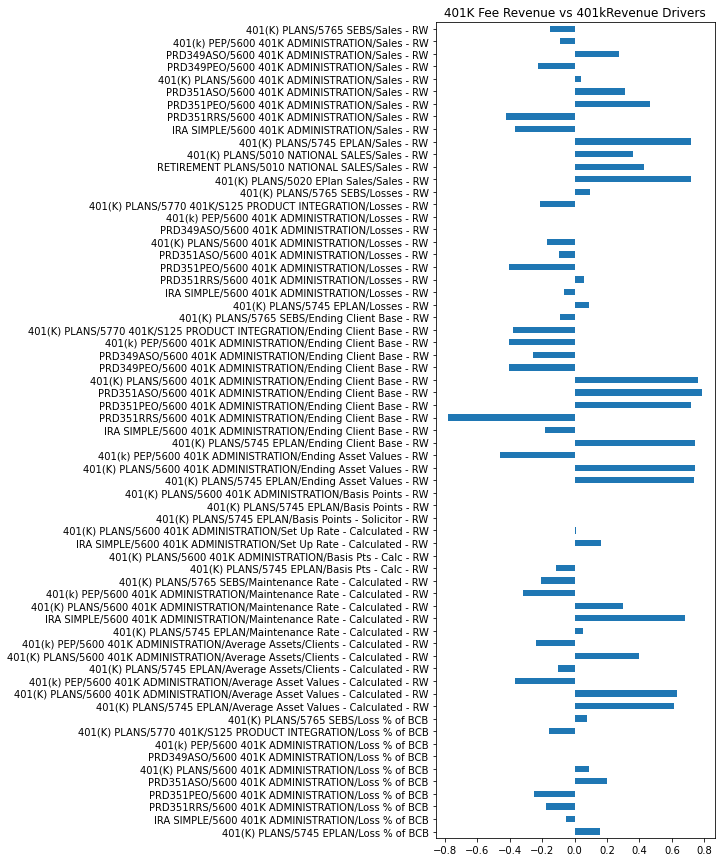

In [20]:
df_cor[::-1].plot.barh(figsize=(5,15), title=item_name +" vs "+driver_name)

In [71]:
top_drivers = df_cor.abs().sort_values(ascending=False)
top_drivers

PRD351ASO/5600 401K ADMINISTRATION/Ending Client Base - RW        0.784489
PRD351RRS/5600 401K ADMINISTRATION/Ending Client Base - RW        0.778132
401(K) PLANS/5600 401K ADMINISTRATION/Ending Client Base - RW     0.759443
401(K) PLANS/5745 EPLAN/Ending Client Base - RW                   0.741480
401(K) PLANS/5600 401K ADMINISTRATION/Ending Asset Values - RW    0.739981
                                                                    ...   
401(K) PLANS/5745 EPLAN/Basis Points - RW                              NaN
401(K) PLANS/5745 EPLAN/Basis Points - Solicitor - RW                  NaN
401(K) PLANS/5600 401K ADMINISTRATION/Basis Pts - Calc - RW            NaN
401(k) PEP/5600 401K ADMINISTRATION/Loss % of BCB                      NaN
PRD349ASO/5600 401K ADMINISTRATION/Loss % of BCB                       NaN
Name: 401K Fee Revenue, Length: 65, dtype: float64

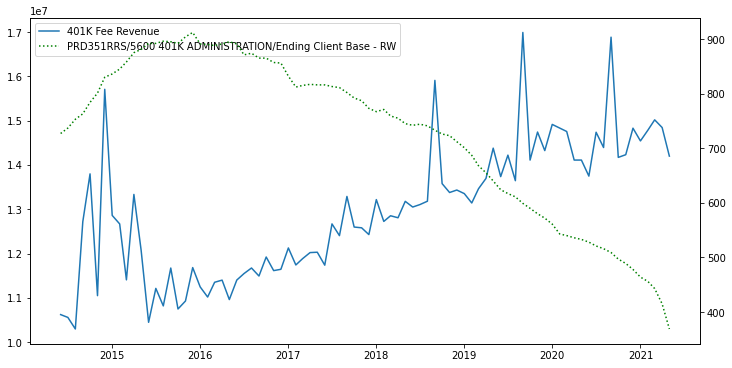

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

ax2 = ax.twinx()
lns1 = ax.plot(get_item_df(df, item_name), label=item_name)
lns2 = ax2.plot(get_driver_df(df, driver_name)[top_drivers.index[1]], label=top_drivers.index[1], c='green', ls=":")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)



In [22]:
item_name = '401K Asset fee & BP Revenue'
driver_name = '401kRevenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

<AxesSubplot:title={'center':'401K Asset fee & BP Revenue vs 401kRevenue Drivers'}>

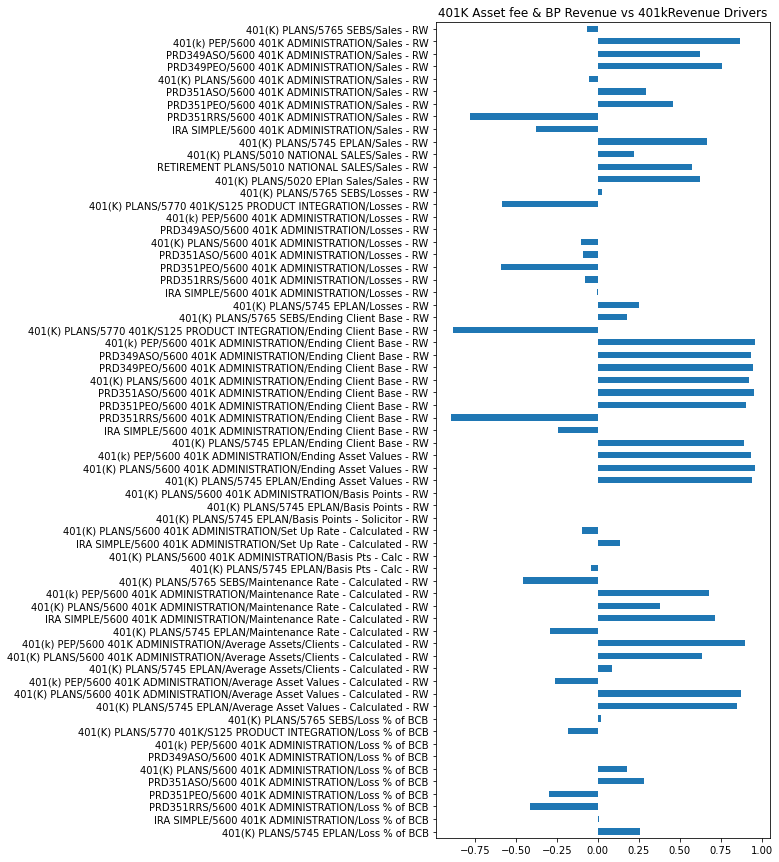

In [23]:
df_cor[::-1].plot.barh(figsize=(6,15), title=item_name +" vs "+driver_name)

## Payroll blended products

In [414]:
item_name = 'Payroll blended products'
driver_name = 'Payroll blended products Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


In [3]:
#df_cor[(df_cor>0.22)|(df_cor<-0.22)][::-1].plot.barh(figsize=(5,50), title=item_name +" vs "+driver_name)

## Workers Comp - Payment Services

In [387]:
item_name = 'Workers Comp - Payment Services'
driver_name = 'Workers Comp - Payment Services Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Workers Comp - Payment Services vs Workers Comp - Payment Services Drivers'}>

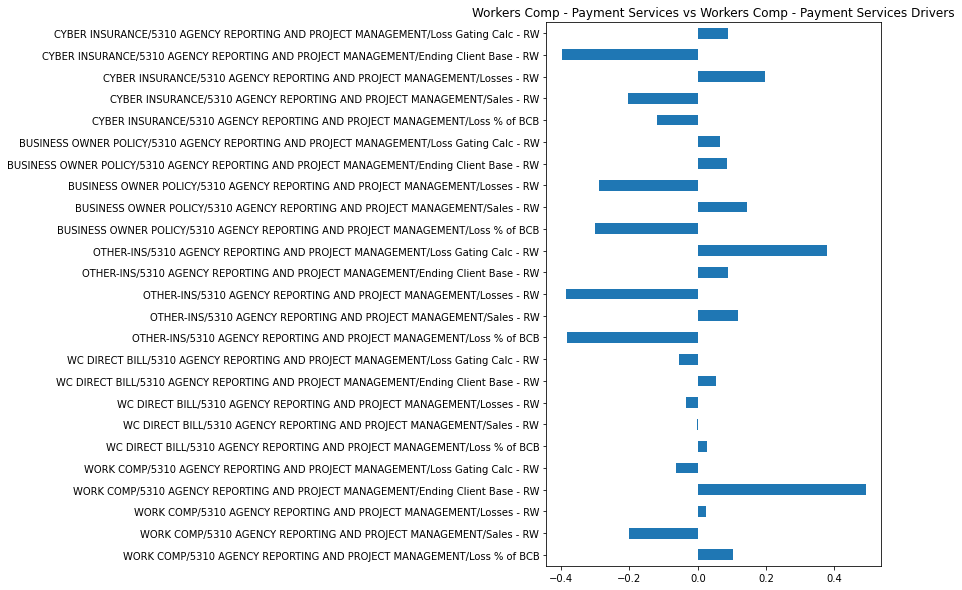

In [388]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Health Benefits

In [389]:
item_name = 'Health Benefits'
driver_name = 'Health Benefits Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Health Benefits vs Health Benefits Drivers'}>

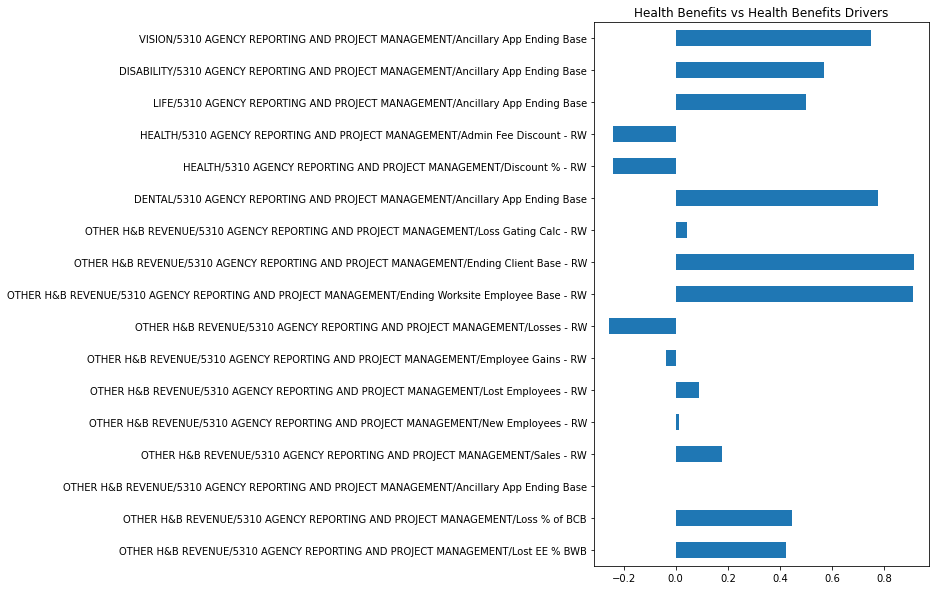

In [391]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## HR Online

In [392]:
item_name = 'HR Online'
driver_name = 'Online Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'HR Online vs Online Revenue Drivers'}>

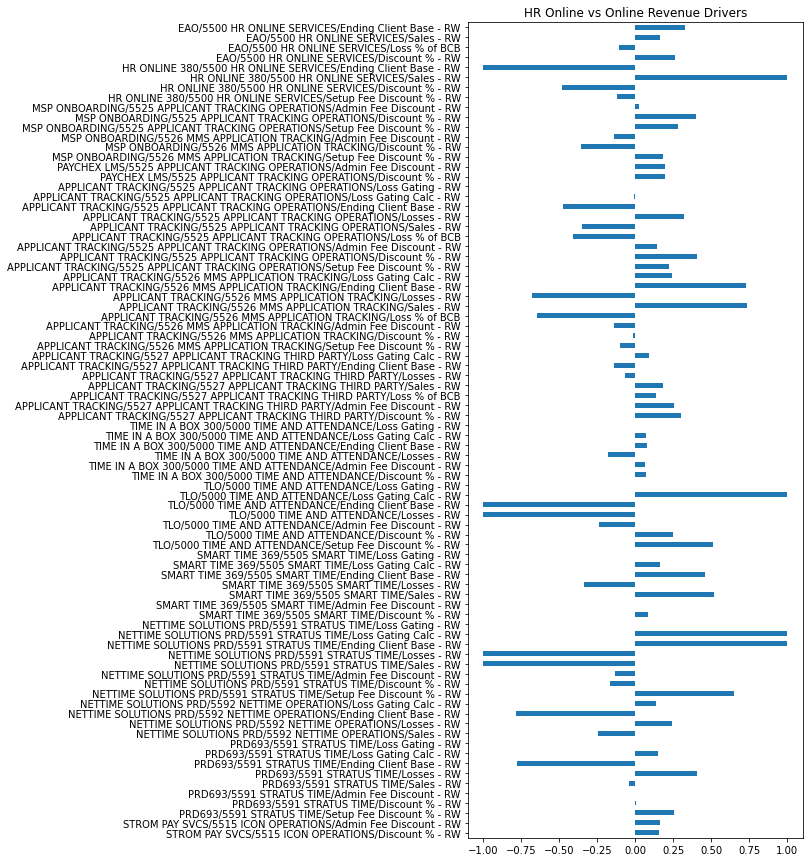

In [393]:
df_cor[::-1].plot.barh(figsize=(6,15), title=item_name +" vs "+driver_name)

## Time & Attendance

In [394]:
item_name = 'Time & Attendance'
driver_name = 'Online Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Time & Attendance vs Online Revenue Drivers'}>

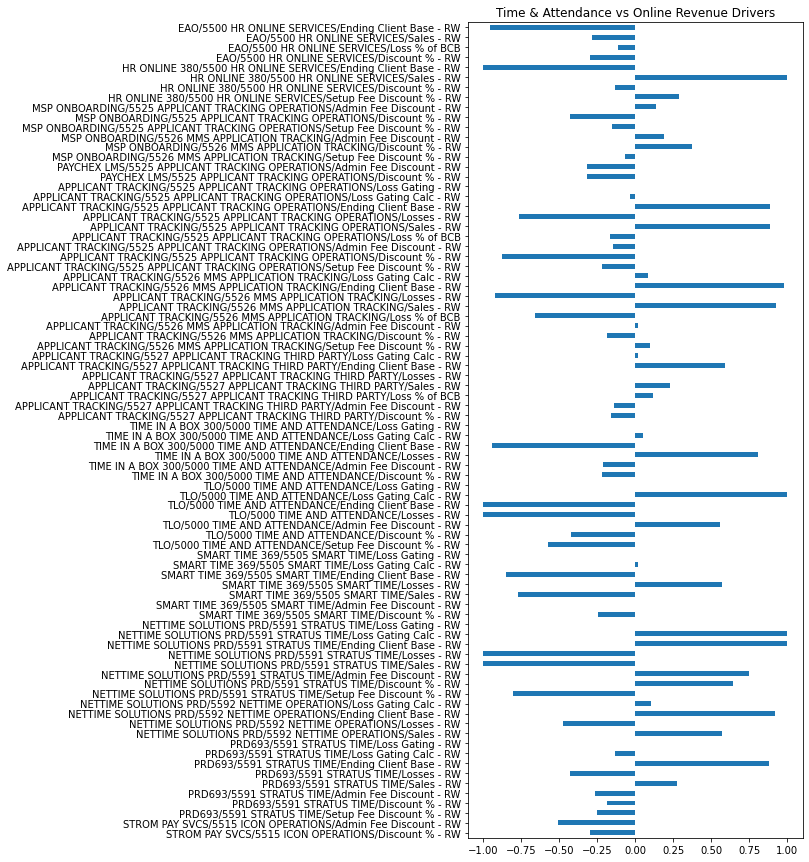

In [395]:
df_cor[::-1].plot.barh(figsize=(6,15), title=item_name +" vs "+driver_name)

## Total Paychex Advance

In [396]:
item_name = 'Total Paychex Advance'
driver_name = 'Total Paychex Advance Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Total Paychex Advance vs Total Paychex Advance Drivers'}>

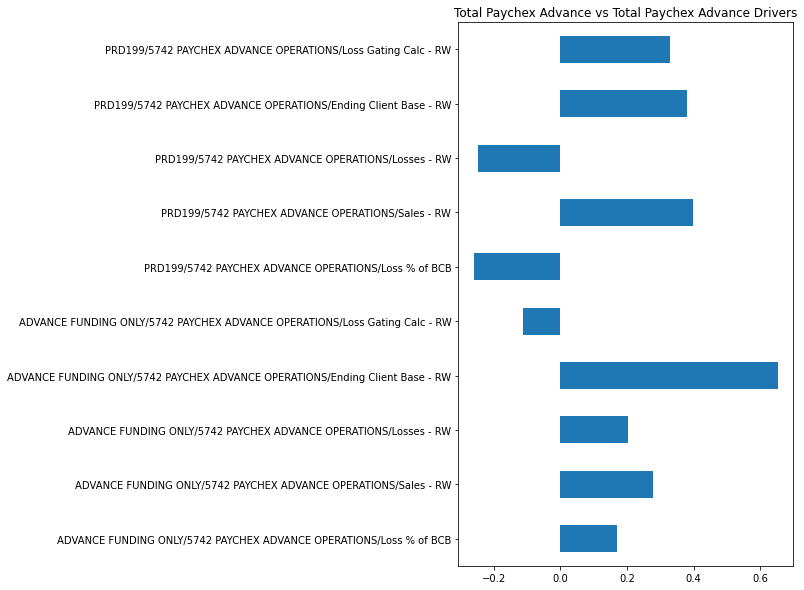

In [397]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Full Service Unemployment Revenue

In [398]:
item_name = 'Full Service Unemployment Revenue'
driver_name = 'Full Service Unemployment Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Full Service Unemployment Revenue vs Full Service Unemployment Revenue Drivers'}>

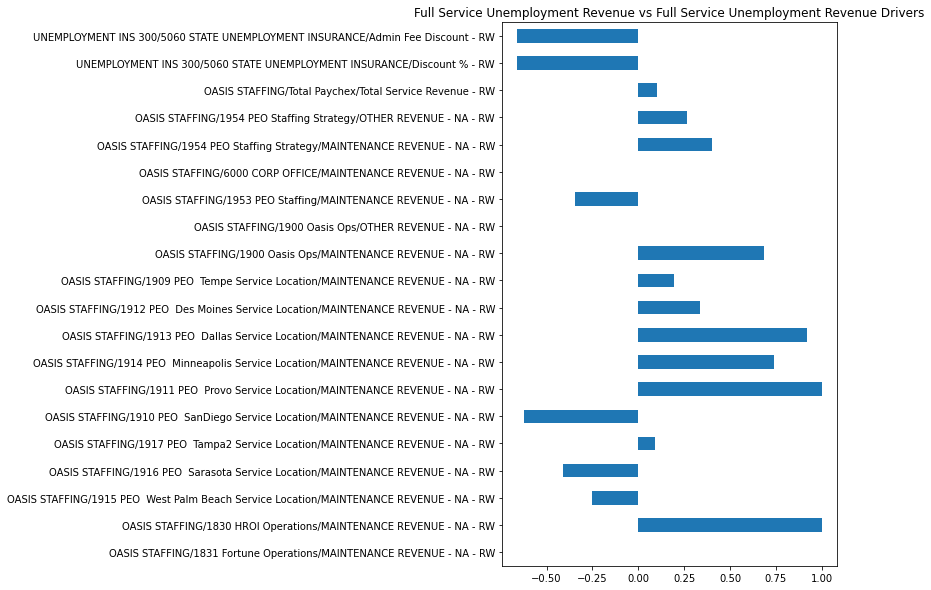

In [399]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## ESR Revenue

In [400]:
item_name = 'ESR Revenue'
driver_name = 'ESR Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'ESR Revenue vs ESR Revenue Drivers'}>

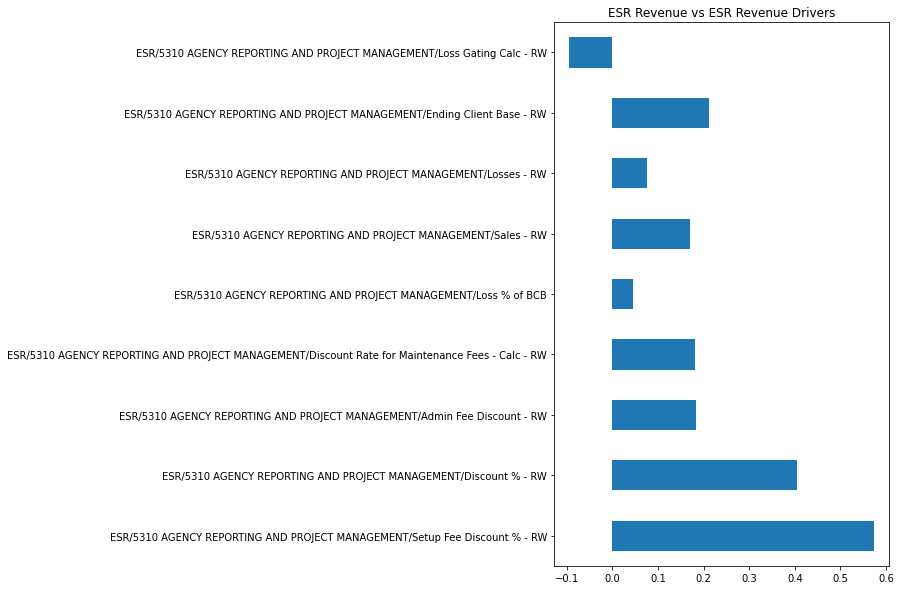

In [401]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Cafeteria Plans Revenue

In [402]:
item_name = 'Cafeteria Plans Revenue'
driver_name = 'Cafeteria Plans Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Cafeteria Plans Revenue vs Cafeteria Plans Revenue Drivers'}>

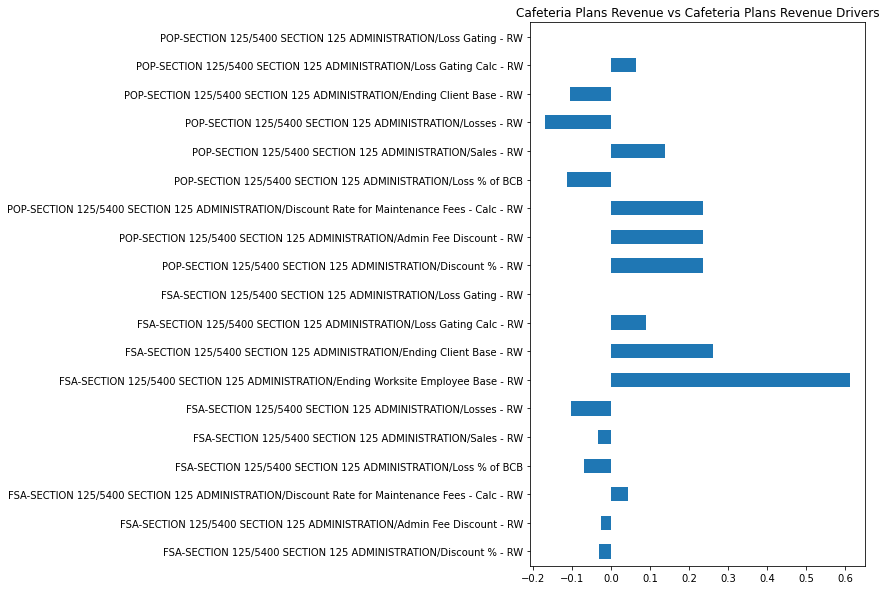

In [403]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Benetrac

In [404]:
item_name = 'Benetrac'
driver_name = 'Benetrac Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Benetrac vs Benetrac Drivers'}>

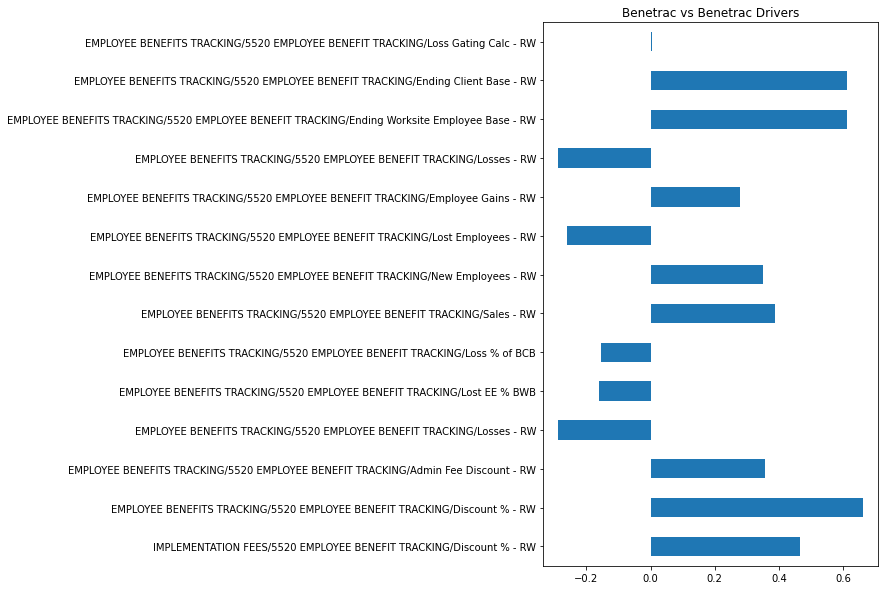

In [405]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Emerging Products

In [406]:
item_name = 'Emerging Products'
driver_name = 'Emerging Products Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


<AxesSubplot:title={'center':'Emerging Products vs Emerging Products Drivers'}>

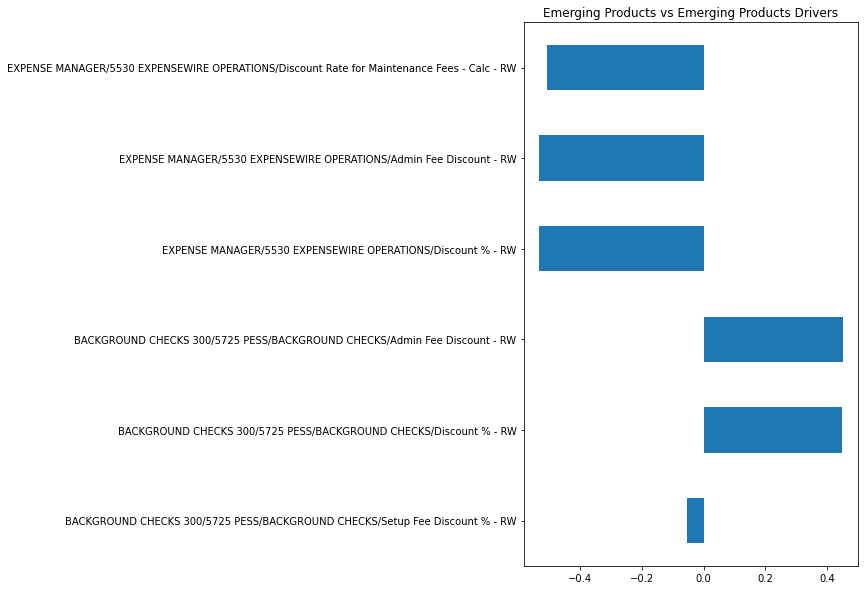

In [407]:
df_cor[::-1].plot.barh(figsize=(6,10), title=item_name +" vs "+driver_name)

## Total PEO

In [408]:
item_name = 'Total PEO'
driver_name = 'PEO Revenue Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


In [1]:
#df_cor[(df_cor>=0.30)|(df_cor<=-0.30)][::-1].plot.barh(figsize=(6,60), title=item_name +" vs "+driver_name)

## SurePayroll.

In [417]:
item_name = 'SurePayroll.'
driver_name = 'SurePayroll. Drivers'
df_cor = get_correlation_vector(df, item_name, driver_name)

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_18940\594863164.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df_item.set_index('Calendar Date').sum(1).rename(item_name)


In [2]:
#df_cor[(df_cor>=0.2)|(df_cor<=-0.2)][::-1].plot.barh(figsize=(5,40), title=item_name +" vs "+driver_name)